In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train = pd.read_excel('2022-05-06_19_17_37.xlsx', sheet_name='Comments',skiprows=1)  

In [ ]:
df_train

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков
0,Вконтакте,-115807015_2334,5412482_2336,Валентин Точилкин,5412482.0,Задумка понравилась! Думаю будет смотреться лу...,Нейтральность,2021-12-31 08:19:05,1
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199.0,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303.0,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361.0,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621.0,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1
...,...,...,...,...,...,...,...,...,...
21493,Вконтакте,-24682865_28855,608612_29743,Алексей Рысаков,608612.0,С мая месяца мурыжат с возвратом денег. Все за...,Негатив,2021-12-08 19:23:12,1
21494,Вконтакте,-24682865_28855,514006271_30353,Red Kirill,514006271.0,Нет войне!,Нейтральность,2022-03-01 14:40:12,0
21495,Вконтакте,-139121250_17896,551359045_17980,Владимир Прин,551359045.0,Чот много смартфонов на винде я погляжу,Нейтральность,2021-09-05 19:02:41,0
21496,Вконтакте,-139121250_17896,510436278_17982,Дима Асеев,510436278.0,"На тот момент система была хорошей, и мне каже...",Нейтральность,2021-09-05 19:06:47,8


In [ ]:
# df_train = df_train.sample(n=int(len(df_train)*0.2), random_state=45)

In [ ]:
df_train = df_train[['Текст','Эмоциональный окрас']]

In [ ]:
df_train.groupby('Эмоциональный окрас').count()

,Текст
Эмоциональный окрас,
Вежливость,652
Негатив,3950
Нейтральность,11811
Неопределенность,1146
Позитив,2539
Юмор,1399


In [ ]:
df_train.drop(df_train[df_train['Эмоциональный окрас']=='Неопределенность'].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from collections import Counter

def is_letter(s):
    return s.isalpha()

def is_smile(s):
    return ord(s) > 9000

c = Counter()

for idx, row in df_train.iterrows():
    c.update(row['Текст'])

In [ ]:
c.most_common()

[(' ', 291905),
 ('о', 159460),
 ('е', 125686),
 ('а', 125488),
 ('т', 107675),
 ('и', 102083),
 ('н', 95338),
 ('с', 73063),
 ('р', 67124),
 ('л', 60515),
 ('к', 59724),
 ('в', 55787),
 ('п', 46132),
 ('м', 44327),
 ('д', 44300),
 ('у', 43173),
 ('ь', 30789),
 ('б', 29326),
 ('ы', 27358),
 ('я', 26223),
 ('.', 23453),
 ('ч', 23167),
 ('з', 22076),
 (',', 22069),
 ('г', 20270),
 ('й', 17390),
 ('ж', 15524),
 ('х', 10962),
 ('ш', 10552),
 ('ю', 9802),
 ('ф', 9150),
 ('0', 7798),
 ('\n', 7714),
 ('t', 7197),
 ('/', 7144),
 ('?', 6777),
 ('э', 5956),
 ('-', 5880),
 ('ц', 5773),
 ('s', 5141),
 ('o', 5036),
 ('П', 5034),
 ('1', 4639),
 ('i', 4541),
 (')', 4529),
 ('f', 4350),
 ('!', 4334),
 ('w', 4298),
 ('щ', 4251),
 ('e', 4203),
 ('Т', 4122),
 ('r', 4067),
 ('2', 3970),
 ('n', 3874),
 ('Н', 3801),
 ('l', 3800),
 ('a', 3746),
 (':', 3657),
 ('С', 3607),
 ('В', 3488),
 ('А', 3464),
 ('ё', 3384),
 ('u', 3131),
 ('К', 3066),
 ('5', 3063),
 ('О', 2938),
 ('p', 2917),
 ('k', 2796),
 ('h', 2619)

In [ ]:
smiles_to_save = []

for k ,v in c.most_common():
    if v < 20 or not is_smile(k):
        continue
    # print(k, is_letter(k), is_smile(k), v)
    smiles_to_save.append(k)

rstring_smiles_to_save = f"({'|'.join(smiles_to_save)})"
rstring_smiles_to_save

'(👍|🔘|🤣|🏻|😂|👇|️|🤔|😊|😁|🔥|😄|😉|♂|❤|🤦|😆|😅|😡|😃|😎|🤗|😍|🙂|👏|🤷|😀|👎|💪|👌|☺|❗|♀|✌|😭|😏|💛|🙄|😔|🎄|🙏|😢|🙌|💳|🥳|😳|🙃|🙈|🎁)'

In [ ]:
df_train['Текст'].iloc[25]

'Как строки с числами работают🤣🤣'

In [ ]:
import re

def preprocess_text(text):
    text = text.lower().replace("ё", "е")
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text)
    text = re.sub('@[^\s]+', 'USER', text)
    text = re.sub(f'[^(a-zA-Zа-яА-Я1-9{rstring_smiles_to_save})]+', ' ', text)
    text = re.sub(' +', ' ', text)
    return text.strip()


def add_spaces_for_smiles(text):
    text = list(text)
    for i, t in enumerate(text):
        if is_smile(t):
            text[i] = ' ' + t + ' '
    return re.sub(' +', ' ', ''.join(text))

df_train['Текст'] = df_train['Текст'].apply(add_spaces_for_smiles)
df_train['Текст'] = df_train['Текст'].apply(preprocess_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
preprocess_text(df_train['Текст'].iloc[25])

'как строки с числами работают 🤣 🤣'

In [ ]:
# from nltk.tokenize import word_tokenize

In [ ]:
# !sudo pip install nltk
# nltk.download('all')

In [ ]:
# word_tokenize(df_train['Текст'].iloc[25])

In [ ]:
#удаляем стоп-слова
def stopwords_of_column(s):
    if len(s.split(' ')) == 1:
        return s
    return ' '.join([w for w in s.split(' ') if w not in stopwords.words('russian')])

In [ ]:
stopwords_of_column(df_train['Текст'].iloc[25])

'строки числами работают 🤣 🤣'

In [ ]:
df_train['Текст']= df_train.apply(lambda x: stopwords_of_column(x['Текст']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
#стеммизация
def stem_words(arr_words, stemmer):
    return ' '.join(map(stemmer.stem, arr_words.split(' ')))

In [ ]:
snow_stemmer = SnowballStemmer(language='russian')
stem_words(df_train['Текст'].iloc[25], snow_stemmer)

'строк числ работа 🤣 🤣'

In [ ]:
df_train['Текст']= df_train.apply(lambda x: stem_words(x['Текст'], snow_stemmer), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
all_words = []
for i in range(df_train.shape[0]):
    for word in df_train['Текст'].iloc[i].split(' '):
        all_words.append(word)

all_words = list(set(all_words))
# all_words_dict = {k:v for v, k in enumerate(all_words)}

In [ ]:
print('уникальных слов, смайлов, эмодзи:', len(all_words))

уникальных слов, смайлов, эмодзи: 23046


In [ ]:
df_train[51:59]

,Текст,Эмоциональный окрас
53,одн кодогенерац 😅 уб,Негатив
54,ростелек сраз минус,Нейтральность
55,ваш успех отвеча ростелек ответ дожд освобод о...,Юмор
56,звуч угроз,Нейтральность
57,хех стажировк стро велик российск файерволл ля...,Юмор
58,отписа захотел так вброс спам (,Негатив
59,заслужен,Позитив
60,наступа нов год 🥳 больш молодц держа 👍 💪 ✌,Вежливость


In [ ]:
# s = ['как строки -   с числами работают 🤣 🤣 !']

In [ ]:
maxWordsCount = 30000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»',
                         lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(list(df_train['Текст']))

In [ ]:
df_train['Текст'].iloc[25]

'строк числ работа 🤣 🤣'

In [ ]:
arr = tokenizer.texts_to_sequences([df_train['Текст'].iloc[25]])
arr

[[812, 243, 20, 71, 71]]

In [ ]:
tokenizer.sequences_to_texts(arr)

['строк числ работа 🤣 🤣']

In [ ]:
data = tokenizer.texts_to_sequences(list(df_train['Текст']))

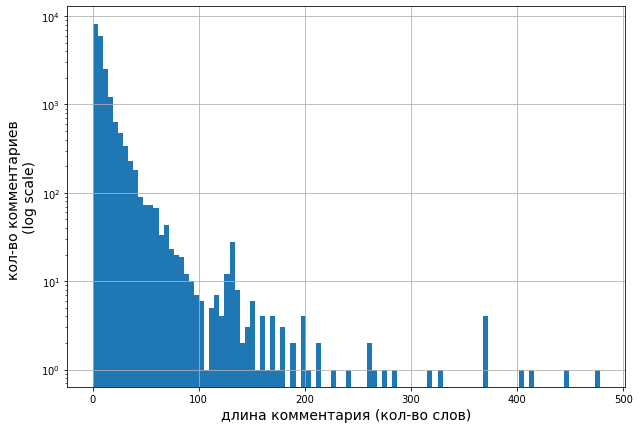

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,7))
plt.hist([len(d) for d in data], bins=100)
plt.yscale('log')
plt.ylabel('кол-во комментариев \n(log scale)', fontsize=14)
plt.xlabel('длина комментария (кол-во слов)', fontsize=14)
plt.grid()

In [ ]:
max_text_len = 100
data_pad = tf.keras.preprocessing.sequence.pad_sequences(data, maxlen=max_text_len,padding='post')
print(data_pad)
print(data_pad.shape)

[[3378  827   98 ...    0    0    0]
 [ 363  582  264 ...    0    0    0]
 [2484  915 2191 ...    0    0    0]
 ...
 [3073  814  442 ...    0    0    0]
 [ 242  292   89 ...    0    0    0]
 [1785  290   84 ...    0    0    0]]
(20351, 100)


In [ ]:
data_pad[25]

array([812, 243,  20,  71,  71,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [ ]:
# class2id = {k:i for i, k in enumerate(df_train['Эмоциональный окрас'].unique())}

In [ ]:
df_test = pd.read_excel('тестовая выборка.xlsx',skiprows=1)#, sheet_name='Comments',skiprows=1)  

In [ ]:
df_test.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев
0,Вконтакте,-179883141_1180,IT-Academy | Гомель,Партнер Open IT Gomel — SoftTeco🌟 \n \nПрисоед...,Позитив,2022-01-30 18:11:00,0,0,0,155.0,0,0,0,0,0,0
1,Вконтакте,-117808194_12908,ArtCraft CG,Невероятные картины «из будущего» 😍\n\nАвтор: ...,Позитив,2022-01-30 18:00:00,1,37,9,2847.0,0,0,1,0,0,0
2,Вконтакте,-151903338_4595,IT-Academy | Гродно,"Опрос показал, что треть респондентов заходят ...",Нейтральность,2022-01-30 17:16:59,0,2,0,123.0,0,0,0,0,0,0
3,Вконтакте,-30767675_26961,Фонд «Сколково»,"Первый зимний урожай клубники, выращенной по т...",Позитив,2022-01-30 16:45:02,7,49,16,5920.0,0,0,1,0,0,0
4,Вконтакте,-151903338_4594,IT-Academy | Гродно,"Помнишь, мы приглашали узнать, кто лишний в IT...",Негатив,2022-01-30 16:22:16,0,1,0,147.0,0,0,0,0,0,0


In [ ]:
df_test = df_test[['Текст','Эмоциональный окрас']]

In [ ]:
df_test[df_test['Эмоциональный окрас']=='Неопределенность']
df_test.drop(df_test[df_test['Эмоциональный окрас']=='Неопределенность'].index, inplace=True)
df_test.reset_index(inplace=True)
df_test.drop('index', axis=1, inplace=True)

In [ ]:
df_test['Текст'] = df_test['Текст'].apply(preprocess_text) #почистим текст на пунктуацию, заглавные буквы, ссылки и тд
df_test['Текст'] = df_test['Текст'].apply(add_spaces_for_smiles) #раделим смайлы
df_test['Текст']= df_test.apply(lambda x: stopwords_of_column(x['Текст']), axis=1) #удаляем стоп слова
df_test['Текст']= df_test.apply(lambda x: stem_words(x['Текст'], snow_stemmer), axis=1) #стеммизация

In [ ]:
data_test = tokenizer.texts_to_sequences(list(df_test['Текст']))
data_pad_test = tf.keras.preprocessing.sequence.pad_sequences(data_test, maxlen=max_text_len,padding='post')

In [ ]:
df_test.groupby('Эмоциональный окрас').count()

,Текст
Эмоциональный окрас,
Вежливость,17
Негатив,191
Нейтральность,1213
Позитив,1032
Юмор,37


In [ ]:
theme2id = {k:i for i, k in enumerate(sorted(df_test['Эмоциональный окрас'].unique()))}
#theme2id['Неопределенность'] = 5
theme2id

{'Вежливость': 0, 'Негатив': 1, 'Нейтральность': 2, 'Позитив': 3, 'Юмор': 4}

In [ ]:
X_test = data_pad_test
df_test.drop(df_test[df_test['Эмоциональный окрас']=='Неопределенность'].index, inplace=True)
y_true = df_test['Эмоциональный окрас'].apply(lambda x: theme2id[x]).values
Y_test = pd.get_dummies(df_test['Эмоциональный окрас'],prefix='окрас')
print(X_test.shape, Y_test.shape)

(2490, 100) (2490, 5)


In [ ]:
X = data_pad
Y = pd.get_dummies(df_train['Эмоциональный окрас'],prefix='окрас')#pd.get_dummies(df_train['Эмоциональный окрас'].apply(lambda x: class2id[x])).values
print(X.shape, Y.shape)

(20351, 100) (20351, 5)


In [ ]:
# tf.debugging.set_log_device_placement(True)

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(maxWordsCount, 128, input_length = max_text_len))
# model.add(tf.keras.layers.LSTM(64, activation='tanh', return_sequences=True))
# model.add(tf.keras.layers.LSTM(32, activation='tanh'))
# model.add(tf.keras.layers.Dense(5, activation='softmax'))
# model.summary()
 
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(0.0001))

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(maxWordsCount, 128, input_length = max_text_len))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh',  return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=tf.keras.optimizers.Adam(0.0001))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          3840000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 3,980,357
Trainable params: 3,980,357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X, Y, batch_size=64, epochs=10,validation_data=(X_test, Y_test))

Epoch 1/10
318/318 [==============================] - 13s 26ms/step - loss: 1.2205 - categorical_accuracy: 0.5766 - val_loss: 1.3979 - val_categorical_accuracy: 0.4863
Epoch 2/10
318/318 [==============================] - 7s 22ms/step - loss: 1.1015 - categorical_accuracy: 0.6028 - val_loss: 1.4996 - val_categorical_accuracy: 0.3382
Epoch 3/10
318/318 [==============================] - 7s 22ms/step - loss: 0.9291 - categorical_accuracy: 0.6616 - val_loss: 1.7184 - val_categorical_accuracy: 0.4056
Epoch 4/10
318/318 [==============================] - 7s 22ms/step - loss: 0.7031 - categorical_accuracy: 0.7469 - val_loss: 1.8254 - val_categorical_accuracy: 0.4112
Epoch 5/10
318/318 [==============================] - 7s 22ms/step - loss: 0.5815 - categorical_accuracy: 0.7855 - val_loss: 1.8541 - val_categorical_accuracy: 0.4345
Epoch 6/10
318/318 [==============================] - 7s 22ms/step - loss: 0.4914 - categorical_accuracy: 0.8231 - val_loss: 1.9743 - val_categorical_accuracy: 0.44

In [ ]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(maxWordsCount, 128, input_length = max_text_len))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh',  return_sequences=True)))
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(5, activation='softmax'))
# model.summary()
 
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(0.0001))

In [ ]:
pred = model.predict(X_test)

In [ ]:
#y_true = Y_test
y_pred = np.array(pd.DataFrame(pred).idxmax(axis=1))
accuracy_lstm = np.round(accuracy_score(y_true, y_pred),4)
accuracy_lstm

0.4386

In [ ]:
f1_lstm = np.round(f1_score(y_true, y_pred, average='weighted'),4)
f1_lstm

0.4203

In [ ]:
precision_lstm = np.round(precision_score(y_true, y_pred, average='weighted'),4)
precision_lstm

0.5335

In [ ]:
recall_lstm = np.round(recall_score(y_true, y_pred, average='weighted'),4)
recall_lstm

0.4386

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification

In [ ]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[  8,   0,   2,   7,   0],
       [  1,  73,  98,   5,  14],
       [  8, 257, 822,  85,  41],
       [ 17, 140, 669, 188,  18],
       [  0,   8,  27,   1,   1]])

In [ ]:
id2theme = {i:k for i, k in enumerate(sorted(df_test['Эмоциональный окрас'].unique()))}
id2theme

{0: 'Вежливость', 1: 'Негатив', 2: 'Нейтральность', 3: 'Позитив', 4: 'Юмор'}

In [ ]:
y_true_ = pd.Series(y_true).apply(lambda x: id2theme[x]).values
y_pred_ = pd.Series(y_pred).apply(lambda x: id2theme[x]).values

[]

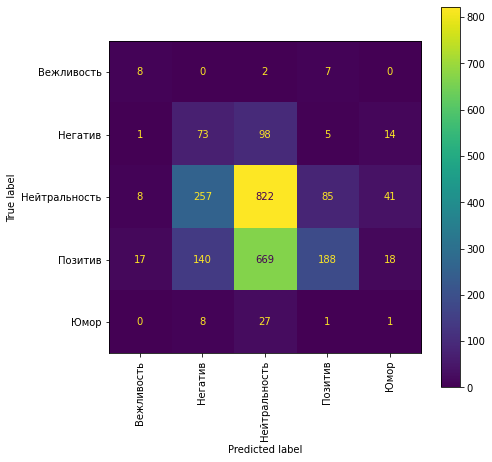

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_true_, y_pred_,xticks_rotation='vertical',ax=ax)
plt.plot()

In [ ]:
vegl_lstm = int(cm[0][0]/cm[0].sum() * 100)
neg_lstm = int(cm[1][1]/cm[1].sum() * 100)
neutral_lstm = int(cm[2][2]/cm[2].sum() * 100)
posit_lstm = int(cm[3][3]/cm[3].sum() * 100)
umor_lstm = int(cm[4][4]/cm[4].sum() * 100)

## dostoevsky

In [ ]:
!pip install dostoevsky

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.9 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3140743 sha256=592c00e8945e842ddeb040af38d27548a6c2d1be332aff786606ae75bf9df4fd
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
!wget https://storage.b-labs.pro/models/fasttext-social-network-model.bin

--2022-06-17 14:48:08--  https://storage.b-labs.pro/models/fasttext-social-network-model.bin
Resolving storage.b-labs.pro (storage.b-labs.pro)... 104.21.14.222, 172.67.160.159, 2606:4700:3035::6815:ede, ...
Connecting to storage.b-labs.pro (storage.b-labs.pro)|104.21.14.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84051390 (80M) [application/x-sega-cd-rom]
Saving to: ‘fasttext-social-network-model.bin’

fasttext-social-net 100%[===================>]  80.16M  15.5MB/s    in 6.5s    

2022-06-17 14:48:16 (12.4 MB/s) - ‘fasttext-social-network-model.bin’ saved [84051390/84051390]



In [ ]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

In [ ]:
# tokenizer = RegexTokenizer()
# FastTextSocialNetworkModel.MODEL_PATH = 'fasttext-social-network-model.bin'
# model = FastTextSocialNetworkModel(tokenizer=tokenizer)
# print(model.predict(['строк числ работа 🤣 🤣']))
# print(model.predict(['строк числ работа🤣🤣']))
# print(model.predict(['строк числ работа']))
# print('\n')
# print(model.predict(['Как строки с числами работают🤣🤣']))
# print(model.predict(['Как строки с числами работают 🤣 🤣']))
# print(model.predict(['Как строки с числами работают']))

In [ ]:
tokenizer = RegexTokenizer()
FastTextSocialNetworkModel.MODEL_PATH = 'fasttext-social-network-model.bin'
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results = model.predict(df_test['Текст'], k = 2)

# for message, sentiment in zip(df_test['Текст'], results):
#     print(message, '->', sentiment)
#     break

In [ ]:
model.predict(['строк числ работа 🤣 🤣'])

[{'negative': 0.06009664759039879,
  'neutral': 0.9911626577377319,
  'positive': 0.00042731568100862205,
  'skip': 0.11597072333097458,
  'speech': 1.0000003385357559e-05}]

In [ ]:
model.predict(['Как строки с числами работают🤣🤣'])

[{'negative': 0.08036746829748154,
  'neutral': 0.9511522054672241,
  'positive': 0.0031826822087168694,
  'skip': 0.06755668669939041,
  'speech': 0.005921069998294115}]

In [ ]:
df_test["Результаты dostoevsky (preprocess)"] = pd.Series([max(_a.items(), key=lambda x: x[1])[0] for _a in results])

In [ ]:
df_test["Результаты dostoevsky (preprocess)"] =  np.where((df_test["Результаты dostoevsky (preprocess)"] == 'neutral'),'Нейтральность', df_test["Результаты dostoevsky (preprocess)"])
df_test["Результаты dostoevsky (preprocess)"] =  np.where((df_test["Результаты dostoevsky (preprocess)"] == 'positive'),'Позитив', df_test["Результаты dostoevsky (preprocess)"])
df_test["Результаты dostoevsky (preprocess)"] =  np.where((df_test["Результаты dostoevsky (preprocess)"] == 'skip'),'Нейтральность', df_test["Результаты dostoevsky (preprocess)"])
df_test["Результаты dostoevsky (preprocess)"] =  np.where((df_test["Результаты dostoevsky (preprocess)"] == 'negative'),'Негатив', df_test["Результаты dostoevsky (preprocess)"])
df_test["Результаты dostoevsky (preprocess)"] =  np.where((df_test["Результаты dostoevsky (preprocess)"] == 'speech'),'Нейтральность', df_test["Результаты dostoevsky (preprocess)"])
df_test["Результаты dostoevsky (preprocess)"] = df_test["Результаты dostoevsky (preprocess)"].fillna('Нейтральность')

In [ ]:
#y_pred_dostoevsky = df_test['Результаты dostoevsky'].apply(lambda x: theme2id[x]).values

In [ ]:
accuracy_dost1 = np.round(accuracy_score(y_true_, df_test['Результаты dostoevsky (preprocess)']),4)
accuracy_dost1

0.4855

In [ ]:
f1_dost1 = np.round(f1_score(y_true_, df_test['Результаты dostoevsky (preprocess)'], average='weighted'),4)
f1_dost1

0.3255

In [ ]:
precision_dost1 = np.round(precision_score(y_true_, df_test['Результаты dostoevsky (preprocess)'], average='weighted'),4)
precision_dost1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4333

In [ ]:
recall_dost1 = np.round(recall_score(y_true_, df_test['Результаты dostoevsky (preprocess)'], average='weighted'),4)
recall_dost1

0.4855

[]

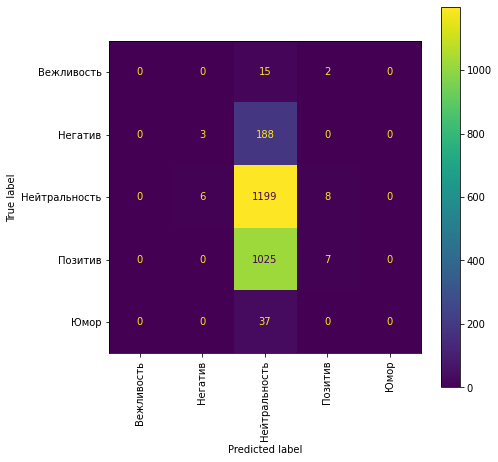

In [ ]:
y_pred_d1 = list(df_test['Результаты dostoevsky (preprocess)'])
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_true_, y_pred_d1,xticks_rotation='vertical',ax=ax)
plt.plot()

In [ ]:
cm1 = confusion_matrix(y_true_, y_pred_d1)
vegl_1 = int(cm1[0][0]/cm1[0].sum() * 100)
neg_1 = int(cm1[1][1]/cm1[1].sum() * 100)
neutral_1 = int(cm1[2][2]/cm1[2].sum() * 100)
posit_1 = int(cm1[3][3]/cm1[3].sum() * 100)
umor_1 = int(cm1[4][4]/cm1[4].sum() * 100)

## without preprocess

In [ ]:
df_test = pd.read_excel('тестовая выборка.xlsx',skiprows=1)#, sheet_name='Comments',skiprows=1)  
df_test = df_test[['Текст','Эмоциональный окрас']]
df_test.drop(df_test[df_test['Эмоциональный окрас']=='Неопределенность'].index, inplace=True)

In [ ]:
tokenizer = RegexTokenizer()
FastTextSocialNetworkModel.MODEL_PATH = 'fasttext-social-network-model.bin'
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

results_new = model.predict(df_test['Текст'], k = 2)

In [ ]:
df_test["Результаты dostoevsky"] = pd.Series([max(_a.items(), key=lambda x: x[1])[0] for _a in results_new])

In [ ]:
df_test["Результаты dostoevsky"] =  np.where((df_test["Результаты dostoevsky"] == 'neutral'),'Нейтральность', df_test["Результаты dostoevsky"])
df_test["Результаты dostoevsky"] =  np.where((df_test["Результаты dostoevsky"] == 'positive'),'Позитив', df_test["Результаты dostoevsky"])
df_test["Результаты dostoevsky"] =  np.where((df_test["Результаты dostoevsky"] == 'skip'),'Нейтральность', df_test["Результаты dostoevsky"])
df_test["Результаты dostoevsky"] =  np.where((df_test["Результаты dostoevsky"] == 'negative'),'Негатив', df_test["Результаты dostoevsky"])
df_test["Результаты dostoevsky"] =  np.where((df_test["Результаты dostoevsky"] == 'speech'),'Нейтральность', df_test["Результаты dostoevsky"])
df_test["Результаты dostoevsky"] = df_test["Результаты dostoevsky"].fillna('Нейтральность')

In [ ]:
accuracy_dost2 = np.round(accuracy_score(y_true_, df_test['Результаты dostoevsky']),4)
accuracy_dost2

0.4823

In [ ]:
f1_dost2 = np.round(f1_score(y_true_, df_test['Результаты dostoevsky'], average='weighted'),4)
f1_dost2

0.3189

In [ ]:
precision_dost2 = np.round(precision_score(y_true_, df_test['Результаты dostoevsky'], average='weighted'),4)
precision_dost2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3057

In [ ]:
recall_dost2 = np.round(recall_score(y_true_, df_test['Результаты dostoevsky'], average='weighted'),4)
recall_dost2

0.4823

[]

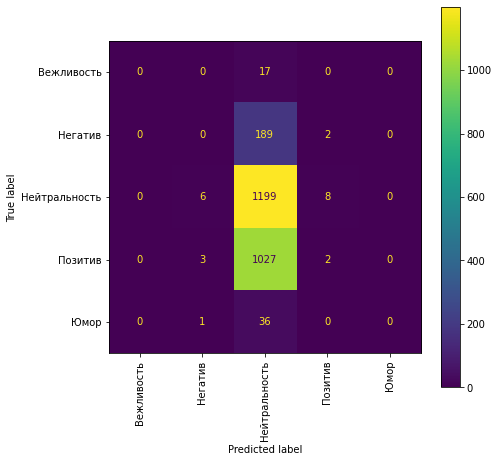

In [ ]:
y_pred_d2 = list(df_test['Результаты dostoevsky'])
fig, ax = plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay.from_predictions(y_true_, y_pred_d2,xticks_rotation='vertical',ax=ax)
plt.plot()

In [ ]:
cm2 = confusion_matrix(y_true_, y_pred_d2)
vegl_2 = int(cm2[0][0]/cm2[0].sum() * 100)
neg_2 = int(cm2[1][1]/cm2[1].sum() * 100)
neutral_2 = int(cm2[2][2]/cm2[2].sum() * 100)
posit_2 = int(cm2[3][3]/cm2[3].sum() * 100)
umor_2 = int(cm2[4][4]/cm2[4].sum() * 100)

In [ ]:
res_perc = {'Вежливость %': [vegl_lstm,vegl_1,vegl_2], 'Негатив %': [neg_lstm,neg_1,neg_2], 'Нейтральность %': [neutral_lstm,neutral_1,neutral_2], 'Позитив %': [posit_lstm,posit_1,posit_2], 'Юмор %': [umor_lstm,umor_1,umor_2]}
df_res = pd.DataFrame(data=res_perc, index=['LSTM', 'dostoevsky with preprocess','dostoevsky'])
df_res

,Вежливость %,Негатив %,Нейтральность %,Позитив %,Юмор %
LSTM,47,38,67,18,2
dostoevsky with preprocess,0,1,98,0,0
dostoevsky,0,0,98,0,0


In [ ]:
d = {'accuracy score': [accuracy_lstm,accuracy_dost1,accuracy_dost2], 'f1 score': [f1_lstm,f1_dost1,f1_dost2], 'precision score': [precision_lstm,precision_dost1,precision_dost2], 'recall score': [recall_lstm,recall_dost1,recall_dost2]}
df_new = pd.DataFrame(data=d, index=['LSTM', 'dostoevsky with preprocess','dostoevsky'])
df_new

,accuracy score,f1 score,precision score,recall score
LSTM,0.4386,0.4203,0.5335,0.4386
dostoevsky with preprocess,0.4855,0.3255,0.4333,0.4855
dostoevsky,0.4823,0.3189,0.3057,0.4823
